In [30]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

Text(0, 0.5, 'Watt')

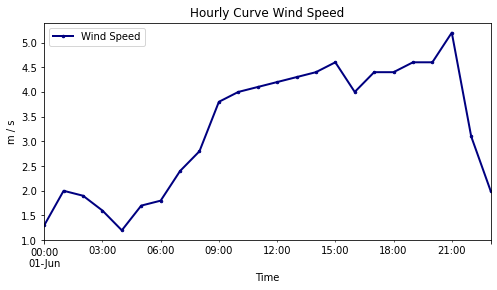

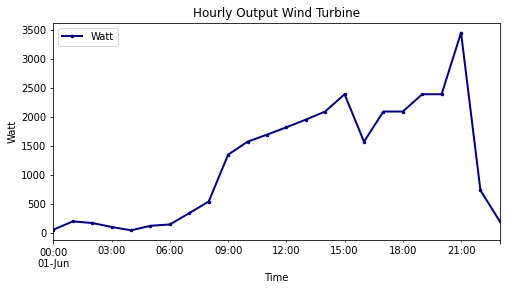

In [43]:
f=open('data/produkt_ff_stunde_20200313_20210913_05705.txt',"r")
rows=f.readlines()
result={}

for row in rows:
    key = row.split(';')[1]
    value = row.split(';')[3]

    if key.startswith('20200601'):
        datetime_key = datetime.strptime(key, '%Y%m%d%H')
        result[datetime_key] = value
f.close()
df = pd.DataFrame.from_dict(result, orient='index', columns=['Wind Speed'])
df['Wind Speed'] =  pd.to_numeric(df['Wind Speed'])

ax = df.plot(lw=2, colormap='jet', marker='.', markersize=5, title='Hourly Curve Wind Speed', figsize=(8, 4))
ax.set_xlabel("Time")
ax.set_ylabel("m / s")

watt = df
watt['Watt'] =  math.pi / 2 * 5.1**2 * watt['Wind Speed']**3 * 1.2 * 0.5
del watt['Wind Speed']
ax = watt.plot(lw=2, colormap='jet', marker='.', markersize=5, title='Hourly Output Wind Turbine', figsize=(8, 4))
ax.set_xlabel("Time")
ax.set_ylabel("Watt")


True
